In [1]:
import numpy as np
import pandas as pd
import torch
import h5py
import torch.nn.functional as F
from rdkit import Chem
from rdkit.Chem import Descriptors
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
from rdkit.Chem import AllChem
from torch_geometric.utils import from_smiles
from sklearn.preprocessing import LabelEncoder



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Moataz203

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Moataz203

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Moataz2030\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\Moataz203

AttributeError: _ARRAY_API not found

c:\Users\Moataz2030\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 2.0.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Moataz2030\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Moataz2030\anacond

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [31]:


# Extract ChEMBL IDs from multiple H5 files
chembl_ids = []
target = []
# List of H5 files
h5_files = ['cdk2.h5', 'egfr_erbB1.h5', 'gsk3b.h5', 'hgfr.h5', 'map_k_p38a.h5', 'tpk_lck.h5', 'tpk_src.h5', 'vegfr2.h5']

for file in h5_files:
    with h5py.File('archive/'+file, 'r') as f:
        if 'chembl_id' in f.keys():
            chembl_ids.extend(f['chembl_id'][:].astype(str))
            for i in range(len(f['chembl_id'])):
                target.append(str(file).split('.')[0])

# Store ChEMBL IDs in a DataFrame

chembl_df = pd.DataFrame(chembl_ids, columns=['chembl_id'])
chembl_df['target'] = target
print(chembl_df.tail())



           chembl_id  target
31195  CHEMBL1278234  vegfr2
31196  CHEMBL1278234  vegfr2
31197  CHEMBL1681952  vegfr2
31198  CHEMBL1765740  vegfr2
31199  CHEMBL1807478  vegfr2


In [ ]:
target_dic={}
for i,j in zip(list(chembl_df['chembl_id']),list(chembl_df['target'])):
    target_dic[i] = j
sec_df = pd.read_csv('smile , ic50')
sec_df=sec_df.drop(columns=['Unnamed: 0'])
sec_target=[]
for i in list(sec_df['chembl_id']):
    sec_target.append(target_dic[i])
sec_df['target'] = sec_target
sec_df['activity'] = (sec_df['IC50'] <= 1000).astype(int)
sec_df = sec_df.drop(columns=['chembl_id','IC50','pic50'])
sec_df

,SMILES,target,activity
0,C/C(Nc1ccc(S(N)(=O)=O)cc1)=C1/C(=O)Nc2ccccc21,cdk2,1
1,COc1ccc2c(c1)/C(=C/c1cnc[nH]1)C(=O)N2,vegfr2,1
2,CN(C)CC(O)COc1ccc(Nc2cc(Nc3ccccc3F)ncn2)cc1,cdk2,0
3,O=C(Nc1n[nH]c2nc(-c3ccc(O)cc3)c(Br)cc12)C1CC1,gsk3b,1
4,CN(C)CC(O)COc1ccc(Nc2cc(Nc3cc(C(F)(F)F)ccc3F)n...,cdk2,0
...,...,...,...
29679,Cc1c(/C=C2\C(=O)Nc3ccc(F)cc32)[nH]c2c1C(=O)N(C...,vegfr2,1
29680,Cc1c(/C=C2\C(=O)Nc3ccc(F)cc32)[nH]c2c1C(=O)N(C...,vegfr2,1
29681,CO/N=C/c1c(N)ncnc1Oc1ccc(NC(=O)Nc2ccc(F)cc2)c(...,vegfr2,1
29682,CNc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2C[C@@H](C(=O)...,vegfr2,1


In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.utils import from_smiles
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np

# Load your processed dataset
#sec_df = pd.read_csv("multi_task_kinase_data.csv")

# Encode the kinase target for multi-task learning
kinase_encoder = LabelEncoder()
sec_df['target'] = kinase_encoder.fit_transform(sec_df['target'])

# Function to convert SMILES to Graph
def smiles_to_graph(smiles):
    try:
        return from_smiles(smiles)
    except Exception as e:
        print(f"Error processing SMILES {smiles}: {e}")
        return None

# Create PyTorch Geometric Dataset
data_list = []
for idx, row in sec_df.iterrows():
    graph = smiles_to_graph(row['SMILES'])
    if graph:
        graph.x = graph.x.float()  # Ensure node features are float
        graph.y = torch.tensor([row['activity']], dtype=torch.float)  # Binary activity
        graph.kinase = torch.tensor([row['target']], dtype=torch.long)  # Target kinase
        data_list.append(graph)

# Balance the dataset by undersampling majority class
class_counts = sec_df['activity'].value_counts()
min_count = class_counts.min()

balanced_data_list = []
for kinase_id in sec_df['target'].unique():
    kinase_graphs = [g for g in data_list if g.kinase.item() == kinase_id]
    active_graphs = [g for g in kinase_graphs if g.y.item() == 1]
    inactive_graphs = [g for g in kinase_graphs if g.y.item() == 0]

    sampled_active = active_graphs[:min_count]
    sampled_inactive = inactive_graphs[:min_count]

    balanced_data_list.extend(sampled_active + sampled_inactive)

# Create DataLoader
batch_size = 64
train_loader = DataLoader(balanced_data_list, batch_size=batch_size, shuffle=True)

# Define Multi-Task GNN Model
class MultiTaskGNN(nn.Module):
    def __init__(self, num_kinases, hidden_dim=128):
        super(MultiTaskGNN, self).__init__()

        self.conv1 = GCNConv(in_channels=9, out_channels=hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)

        # Multi-task output for each kinase
        self.classifier = nn.Linear(hidden_dim, num_kinases)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # GNN Layers
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Pooling to get graph-level representation
        x = global_mean_pool(x, data.batch)

        # Predict for all kinases
        logits = torch.sigmoid(self.classifier(x))

        # Gather output for corresponding kinase task
        output = torch.gather(logits, 1, data.kinase.unsqueeze(1)).squeeze(1)

        return output

# Initialize Model
num_kinases = len(kinase_encoder.classes_)
model = MultiTaskGNN(num_kinases)

# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

# Training and Evaluation Loop
def train_and_evaluate(model, loader, epochs=30):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        y_true, y_pred = [], []

        for batch in loader:
            batch = batch
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch)

            # Compute loss
            loss = criterion(outputs, batch.y)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            y_true.extend(batch.y.cpu().numpy())
            y_pred.extend(outputs.detach().cpu().numpy())

        # Evaluate
        auc = roc_auc_score(y_true, y_pred)
        acc = accuracy_score(y_true, (torch.tensor(y_pred) > 0.5).int())
        f1 = f1_score(y_true, (torch.tensor(y_pred) > 0.5).int())

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, AUC: {auc:.4f}, Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

train_and_evaluate(model, train_loader)

Epoch 1/30, Loss: 294.8191, AUC: 0.6090, Accuracy: 0.6489, F1 Score: 0.7745
Epoch 2/30, Loss: 286.0514, AUC: 0.6454, Accuracy: 0.6751, F1 Score: 0.7862
Epoch 3/30, Loss: 281.5834, AUC: 0.6607, Accuracy: 0.6822, F1 Score: 0.7897
Epoch 4/30, Loss: 278.2361, AUC: 0.6727, Accuracy: 0.6904, F1 Score: 0.7957
Epoch 5/30, Loss: 274.9904, AUC: 0.6862, Accuracy: 0.6971, F1 Score: 0.7995
Epoch 6/30, Loss: 271.7456, AUC: 0.6971, Accuracy: 0.7013, F1 Score: 0.8008
Epoch 7/30, Loss: 269.1010, AUC: 0.7064, Accuracy: 0.7088, F1 Score: 0.8045
Epoch 8/30, Loss: 267.6437, AUC: 0.7119, Accuracy: 0.7069, F1 Score: 0.8021
Epoch 9/30, Loss: 265.1152, AUC: 0.7201, Accuracy: 0.7112, F1 Score: 0.8039
Epoch 10/30, Loss: 263.8655, AUC: 0.7242, Accuracy: 0.7141, F1 Score: 0.8055
Epoch 11/30, Loss: 262.4654, AUC: 0.7282, Accuracy: 0.7154, F1 Score: 0.8057
Epoch 12/30, Loss: 260.8146, AUC: 0.7326, Accuracy: 0.7181, F1 Score: 0.8069
Epoch 13/30, Loss: 260.4634, AUC: 0.7334, Accuracy: 0.7185, F1 Score: 0.8064
Epoch 14

In [131]:
# Enhanced training function with improvements
def improved_train_and_evaluate(model, data_list, epochs=30, batch_size=64, test_size=0.2, patience=7):
    # Split data into train and validation sets
    train_data, val_data = train_test_split(data_list, test_size=test_size, random_state=42)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    
    # Initialize metric storage
    metrics = {
        'train_loss': [], 'train_auc': [], 'train_accuracy': [], 'train_f1': [],
        'val_loss': [], 'val_auc': [], 'val_accuracy': [], 'val_f1': []
    }
    
    # Optimizer with weight decay (L2 regularization)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-5)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, verbose=True
    )
    
    # Loss function
    criterion = nn.BCELoss()
    
    # Early stopping variables
    best_val_loss = float('inf')
    best_model_state = None
    no_improve_count = 0
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        total_loss = 0
        train_y_true, train_y_pred = [], []
        
        for batch in train_loader:
            optimizer.zero_grad()
            outputs = model(batch)
            loss = criterion(outputs, batch.y)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            total_loss += loss.item()
            train_y_true.extend(batch.y.cpu().numpy())
            train_y_pred.extend(outputs.detach().cpu().numpy())
        
        # Calculate and store training metrics
        train_loss = total_loss / len(train_loader)
        train_auc = roc_auc_score(train_y_true, train_y_pred)
        train_acc = accuracy_score(train_y_true, (np.array(train_y_pred) > 0.5).astype(int))
        train_f1_score = f1_score(train_y_true, (np.array(train_y_pred) > 0.5).astype(int))
        
        metrics['train_loss'].append(train_loss)
        metrics['train_auc'].append(train_auc)
        metrics['train_accuracy'].append(train_acc)
        metrics['train_f1'].append(train_f1_score)
        
        # Validation phase
        model.eval()
        val_total_loss = 0
        val_y_true, val_y_pred = [], []
        
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(batch)
                loss = criterion(outputs, batch.y)
                val_total_loss += loss.item()
                val_y_true.extend(batch.y.cpu().numpy())
                val_y_pred.extend(outputs.cpu().numpy())
        
        # Calculate and store validation metrics
        val_loss = val_total_loss / len(val_loader)
        val_auc = roc_auc_score(val_y_true, val_y_pred)
        val_acc = accuracy_score(val_y_true, (np.array(val_y_pred) > 0.5).astype(int))
        val_f1_score = f1_score(val_y_true, (np.array(val_y_pred) > 0.5).astype(int))
        
        metrics['val_loss'].append(val_loss)
        metrics['val_auc'].append(val_auc)
        metrics['val_accuracy'].append(val_acc)
        metrics['val_f1'].append(val_f1_score)
        
        # Print progress
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Train - Loss: {train_loss:.4f}, AUC: {train_auc:.4f}, Acc: {train_acc:.4f}, F1: {train_f1_score:.4f}")
        print(f"  Valid - Loss: {val_loss:.4f}, AUC: {val_auc:.4f}, Acc: {val_acc:.4f}, F1: {val_f1_score:.4f}")
        
        # Update learning rate based on validation loss
        scheduler.step(val_loss)
        
        # Early stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            no_improve_count = 0
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                print(f"Early stopping triggered after epoch {epoch+1}")
                break
    
    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, metrics

Epoch 1/30
  Train - Loss: 0.6367, AUC: 0.6071, Acc: 0.6408, F1: 0.7659
  Valid - Loss: 0.6344, AUC: 0.6291, Acc: 0.6606, F1: 0.7772
Epoch 2/30
  Train - Loss: 0.6255, AUC: 0.6288, Acc: 0.6629, F1: 0.7801
  Valid - Loss: 0.6142, AUC: 0.6446, Acc: 0.6798, F1: 0.7893
Epoch 3/30
  Train - Loss: 0.6100, AUC: 0.6547, Acc: 0.6781, F1: 0.7876
  Valid - Loss: 0.6007, AUC: 0.6705, Acc: 0.6909, F1: 0.7922
Epoch 4/30
  Train - Loss: 0.6009, AUC: 0.6717, Acc: 0.6878, F1: 0.7936
  Valid - Loss: 0.6000, AUC: 0.6773, Acc: 0.6825, F1: 0.7799
Epoch 5/30
  Train - Loss: 0.5948, AUC: 0.6839, Acc: 0.6937, F1: 0.7967
  Valid - Loss: 0.5903, AUC: 0.6911, Acc: 0.6902, F1: 0.7882
Epoch 6/30
  Train - Loss: 0.5900, AUC: 0.6932, Acc: 0.6983, F1: 0.7994
  Valid - Loss: 0.5978, AUC: 0.6966, Acc: 0.6862, F1: 0.7740
Epoch 7/30
  Train - Loss: 0.5839, AUC: 0.7017, Acc: 0.7019, F1: 0.7996
  Valid - Loss: 0.5826, AUC: 0.7000, Acc: 0.7177, F1: 0.8121
Epoch 8/30
  Train - Loss: 0.5813, AUC: 0.7062, Acc: 0.7056, F1: 0.80

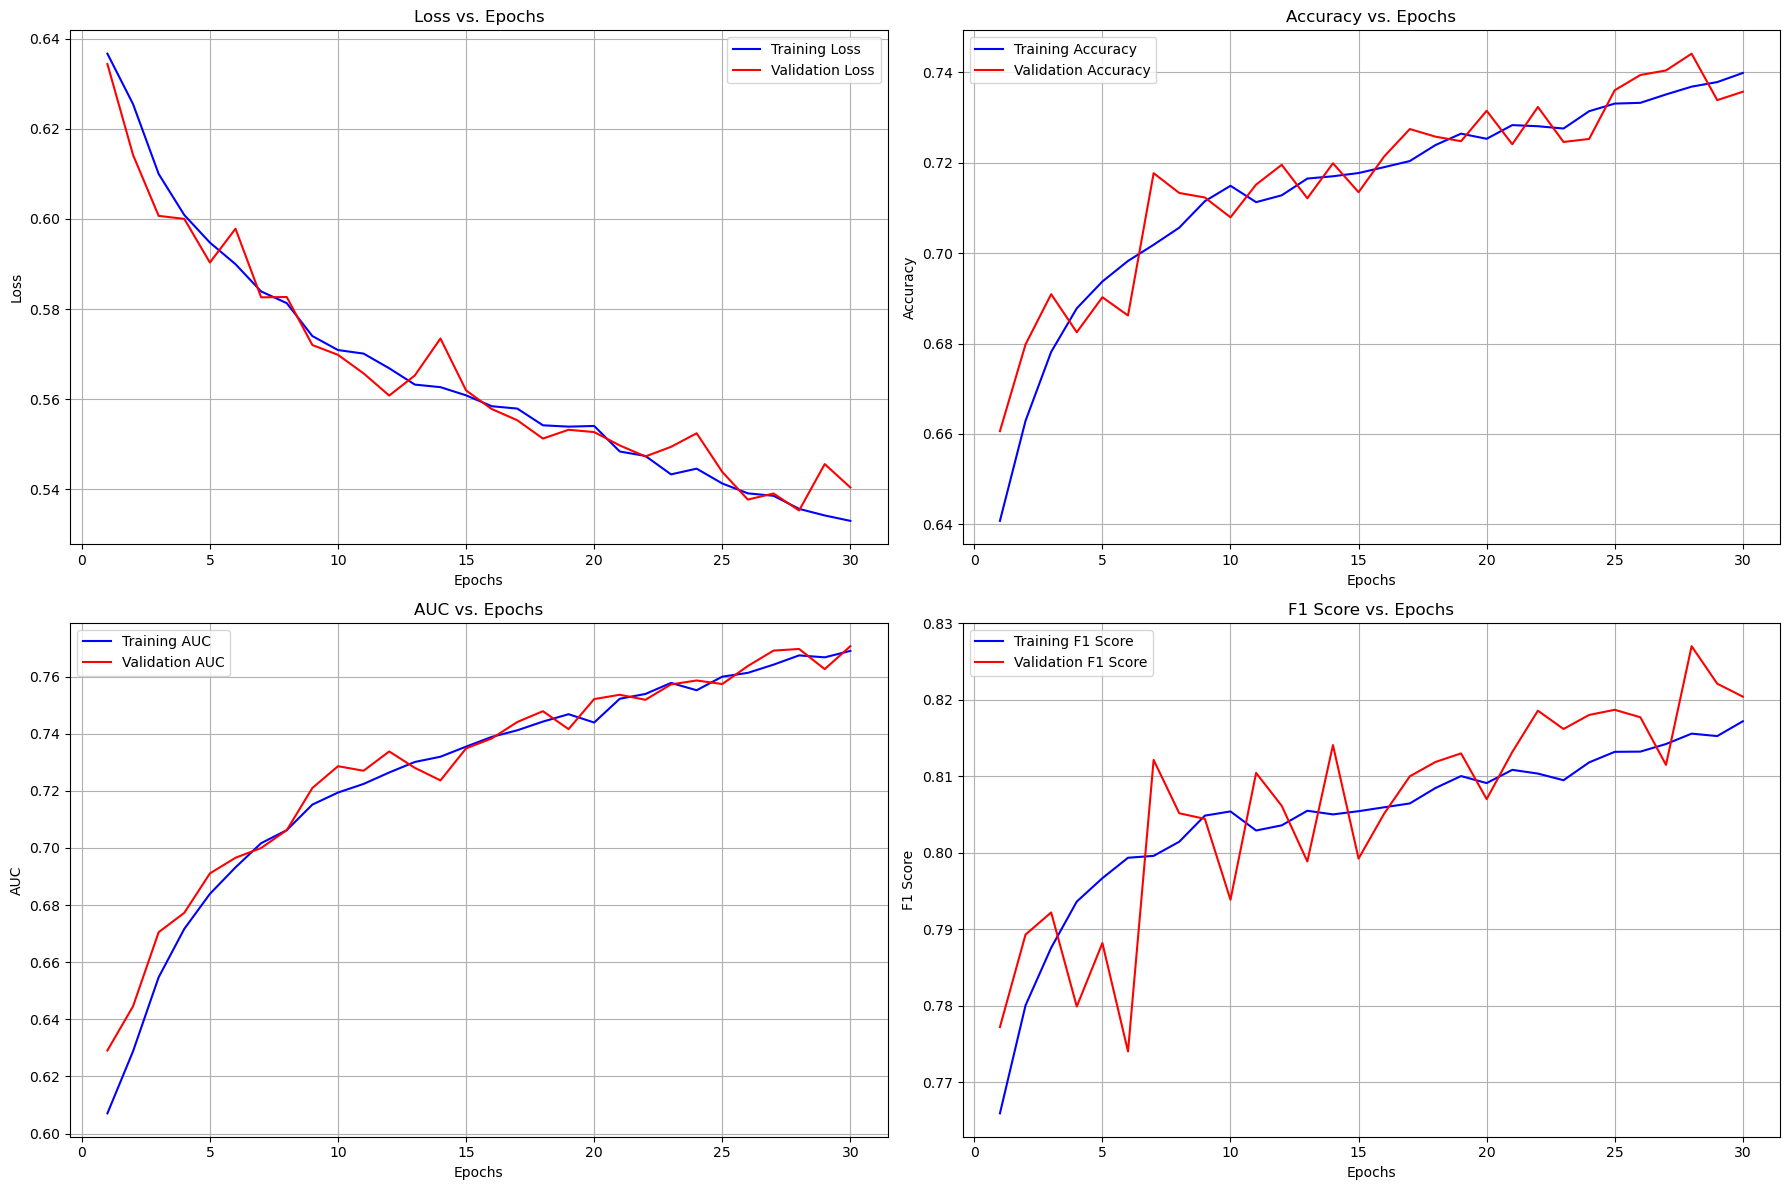

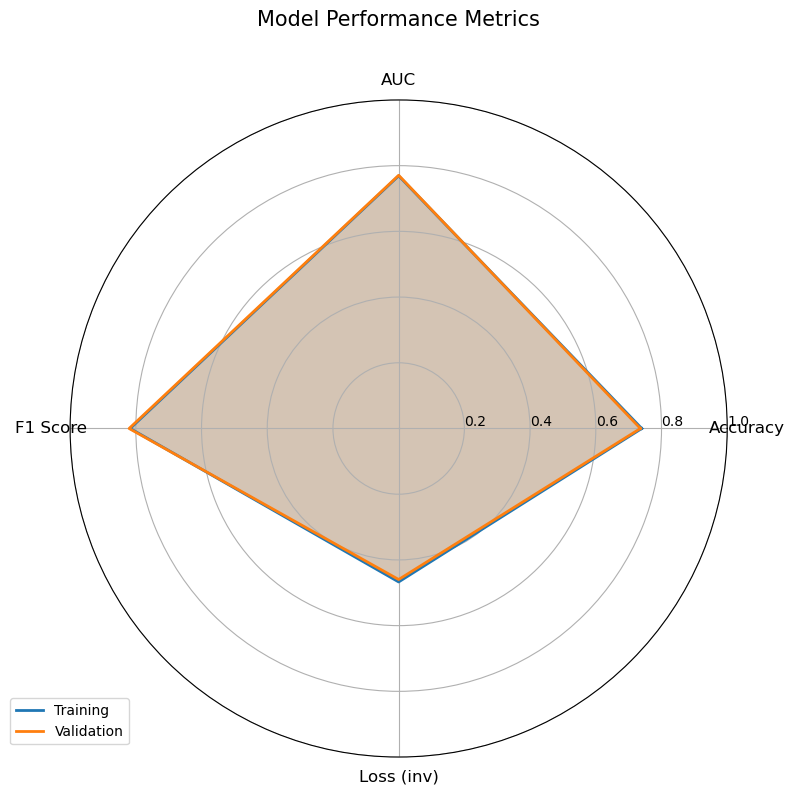

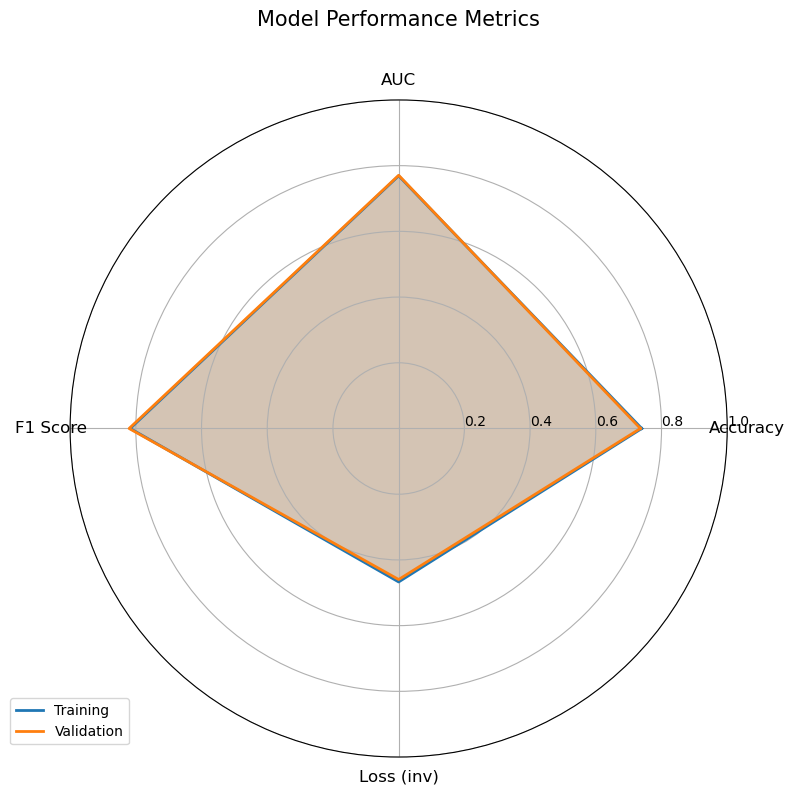

In [132]:
# Initialize your model
num_kinases = len(kinase_encoder.classes_)
model = MultiTaskGNN(num_kinases)

# Train and collect metrics
metrics = train_and_evaluate(model, balanced_data_list, epochs=30)

# Plot the metrics
plot_training_metrics(metrics)
plot_performance_radar(metrics)